In [582]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

#Clusterização
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Regressão
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pickle

- Vicenzo Massao -- RM554833
- Erick Alves -- RM556862
- Luiz Neri -- RM556864


### Fonte dos dados:
https://www.kaggle.com/datasets/pralabhpoudel/world-energy-consumption

## Descrição das Colunas:

- country (país): O nome do país que está sendo analisado.

- year (ano): O ano da observação ou do dado registrado.

- gdp (PIB em milhões): O Produto Interno Bruto (PIB) do país, representado em milhões de dólares. Reflete o total da produção econômica de um país.

- population (população): A população total do país no ano específico.

- fossil_fuel_consumption (consumo de combustíveis fósseis): A quantidade total de energia consumida proveniente de combustíveis fósseis (como carvão, petróleo e gás), geralmente em TWh (terawatt-horas).

- fossil_share_energy (participação dos combustíveis fósseis na energia): A porcentagem de energia total consumida que provém de combustíveis fósseis.

- fossil_share_elec (participação dos combustíveis fósseis na eletricidade): A porcentagem de eletricidade gerada que provém de combustíveis fósseis.

- biofuel_consumption (consumo de biocombustíveis): A quantidade total de energia consumida proveniente de biocombustíveis, geralmente em TWh.

- biofuel_share_energy (participação dos biocombustíveis na energia): A porcentagem de energia total consumida que provém de biocombustíveis.

- solar_consumption (consumo de energia solar): A quantidade total de energia consumida proveniente de energia solar, geralmente em TWh.

- solar_share_energy (participação da energia solar na energia): A porcentagem de energia total consumida que provém de energia solar.

- wind_consumption (consumo de energia eólica): A quantidade total de energia consumida proveniente de energia eólica, geralmente em TWh.

- wind_share_energy (participação da energia eólica na energia): A porcentagem de energia total consumida que provém de energia eólica.

- hydro_consumption (consumo de energia hidrelétrica): A quantidade total de energia consumida proveniente de energia hidrelétrica, geralmente em TWh.

- hydro_share_energy (participação da energia hidrelétrica na energia): A porcentagem de energia total consumida que provém de energia hidrelétrica.

- nuclear_consumption (consumo de energia nuclear): A quantidade total de energia consumida proveniente de energia nuclear, geralmente em TWh.

- nuclear_share_energy (participação da energia nuclear na energia): A porcentagem de energia total consumida que provém de energia nuclear.

- other_renewable_consumption (consumo de outras fontes renováveis): A quantidade total de energia consumida proveniente de fontes renováveis que não sejam biocombustíveis, solar, eólica ou hidrelétrica (como geotérmica, biomassa, etc.), geralmente em TWh.

- other_renewables_share_energy (participação das outras fontes renováveis na energia): A porcentagem de energia total consumida que provém de outras fontes renováveis.

- greenhouse_gas_emissions (emissões de gases de efeito estufa): A quantidade de gases de efeito estufa emitidos pelo país, geralmente medida em toneladas de CO2 equivalente.

- energy_per_capita (energia per capita): A quantidade total de energia consumida por pessoa no país, geralmente em kWh (quilowatt-horas).

- primary_energy_consumption (consumo de energia primária): A quantidade total de energia consumida em termos de energia primária, que inclui a energia utilizada diretamente e a energia convertida em eletricidade, geralmente em TWh.

- per_capita_electricity (eletricidade per capita): A quantidade de eletricidade consumida por pessoa no país, geralmente em kWh.

- electricity_generation (geração de eletricidade): A quantidade total de eletricidade gerada no país, geralmente em TWh.

- green_energy_consumption (consumo de energia verde): A quantidade total de energia consumida proveniente de fontes renováveis (solar, eólica, hidrelétrica, biomassa, etc.), geralmente em TWh.

- fossil_energy_consumption (consumo de energia fóssil): A quantidade total de energia consumida proveniente de combustíveis fósseis, geralmente em TWh. (Pode ser similar ao valor da coluna "fossil_fuel_consumption", dependendo da definição de "energia" usada.)

- energy_consumption (consumo de energia): A quantidade total de energia consumida tanto de energia limpa (solar, eólica, hidrelétrica, biomassa, etc.) e energia poluente.

- renewable_share_energy (participação das energias renováveis na energia): A porcentagem de energia total consumida que provém de fontes renováveis, COMPARADO COM A ENERGIA PRIMARIA DE UM PAÍS. Isso inclui todas as fontes renováveis, como solar, eólica, hidrelétrica, biomassa, etc.

In [583]:
df = pd.read_csv("WorldEnergyConsumption.csv")
df.drop(df[df['country'] == 'ASEAN (Ember)'].index, inplace=True)
df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
23,Afghanistan,1900,AFG,4707744.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,Afghanistan,1901,AFG,4751177.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,Afghanistan,1902,AFG,4802500.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,Afghanistan,1903,AFG,4861833.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,Afghanistan,1904,AFG,4921891.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [584]:
# Decidindo quais colunas são relevantes e ficarão para serem exploradas.
columns_to_keep = [
    'country', 'year', 'gdp', 'population',
    'fossil_fuel_consumption', 'fossil_share_energy', 'fossil_share_elec',
    'biofuel_consumption', 'biofuel_share_energy',
    'solar_consumption', 'solar_share_energy',
    'wind_consumption', 'wind_share_energy',
    'hydro_consumption', 'hydro_share_energy',
    'nuclear_consumption', 'nuclear_share_energy',
    'other_renewable_consumption', 'other_renewables_share_energy',
    'greenhouse_gas_emissions', 'energy_per_capita', 'primary_energy_consumption',
    'per_capita_electricity', 'electricity_generation'
]

df_filtered = df[columns_to_keep]

# Limpando alguns dados faltantes
df_filtered = df_filtered.fillna(0)

In [585]:
# Filtrando apenas alguns anos com bom espaçamento entre eles, para verificação da evolução do GBP, população, etc...
years_of_interest = [2020, 2014, 2005]
df_filtered = df_filtered[df_filtered['year'].isin(years_of_interest)]

# Criando uma coluna 'green_energy_consumption' para somar todos os consumos "verdes" de um país
df_filtered['green_energy_consumption'] = (
    df_filtered['biofuel_consumption'] + df_filtered['solar_consumption'] +
    df_filtered['wind_consumption'] + df_filtered['hydro_consumption'] +
    df_filtered['other_renewable_consumption']
)

df_filtered['fossil_energy_consumption'] = df_filtered['fossil_fuel_consumption']
df_filtered.drop('fossil_fuel_consumption', axis=1, inplace=True)

<ipython-input-585-2663057f639d>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-585-2663057f639d>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-585-2663057f639d>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [586]:
# Criando uma coluna energy_consumption para somar o consumo de energia limpas e poluentes de um país
df_filtered['energy_consumption'] = df_filtered['green_energy_consumption'] + df_filtered['fossil_energy_consumption']

<ipython-input-586-b97d1a847f72>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [587]:
# Calculando a porcentagem de energia consumo que é *RENOVÁVEL*
df_filtered['renewable_share_energy'] = df_filtered['green_energy_consumption'] / df_filtered['primary_energy_consumption'] * 100

<ipython-input-587-4ae7435bfdde>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [588]:
df_filtered['gdp'] = df_filtered['gdp'] / 1e6  # Convertendo o GDP para milhões, para melhorar visibiilidade
df_filtered = df_filtered.rename(columns={'gdp': 'gdp_millions'})

<ipython-input-588-f494b6cfbf70>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [589]:
# Arredondando o gdp para 3 casas decimais, e resetand os indexes
df_filtered['gdp_millions'] = df_filtered['gdp_millions'].round(3)
df_filtered.reset_index(drop=True, inplace=True)
df_filtered.head()

,country,year,gdp_millions,population,fossil_share_energy,fossil_share_elec,biofuel_consumption,biofuel_share_energy,solar_consumption,solar_share_energy,...,other_renewables_share_energy,greenhouse_gas_emissions,energy_per_capita,primary_energy_consumption,per_capita_electricity,electricity_generation,green_energy_consumption,fossil_energy_consumption,energy_consumption,renewable_share_energy
0,Afghanistan,2005,25397.688,2.441120e+07,0.000,36.559,0.000,0.000,0.000,0.000,...,0.000,0.25,252.069,6.153,38.097,0.93,0.000,0.000,0.000,0.000000
1,Afghanistan,2014,64346.108,3.271621e+07,0.000,13.793,0.000,0.000,0.000,0.000,...,0.000,0.13,868.576,28.417,35.456,1.16,0.000,0.000,0.000,0.000000
2,Afghanistan,2020,0.000,3.897224e+07,0.000,15.000,0.000,0.000,0.000,0.000,...,0.000,0.09,702.888,27.393,20.527,0.80,0.000,0.000,0.000,0.000000
3,Africa,2005,0.000,9.278984e+08,92.149,80.287,0.056,0.001,0.084,0.002,...,0.248,301.64,4079.506,3785.367,577.272,535.65,266.151,3488.187,3754.338,7.031049
4,Africa,2014,0.000,1.170299e+09,91.726,79.612,0.568,0.012,5.164,0.105,...,0.326,389.51,4210.886,4927.997,631.309,738.82,371.896,4520.241,4892.137,7.546596


In [590]:
# Salvand o dataframe processado em um arquivo .csv
df_filtered.to_csv("WorldConsumptionProcessed.csv", index=False)

In [591]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        882 non-null    object 
 1   year                           882 non-null    int64  
 2   gdp_millions                   882 non-null    float64
 3   population                     882 non-null    float64
 4   fossil_share_energy            882 non-null    float64
 5   fossil_share_elec              882 non-null    float64
 6   biofuel_consumption            882 non-null    float64
 7   biofuel_share_energy           882 non-null    float64
 8   solar_consumption              882 non-null    float64
 9   solar_share_energy             882 non-null    float64
 10  wind_consumption               882 non-null    float64
 11  wind_share_energy              882 non-null    float64
 12  hydro_consumption              882 non-null    flo

In [592]:
#Vendo quais são os valores que estão em country para fazer um filtro maior tirando os grupos de paises para analisar apenas paises em si
unique_countries = df_filtered['country'].unique()
unique_countries

array(['Afghanistan', 'Africa', 'Africa (EI)', 'Africa (Ember)',
       'Africa (Shift)', 'Albania', 'Algeria', 'American Samoa', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Aruba', 'Asia', 'Asia & Oceania (EIA)', 'Asia (Ember)',
       'Asia Pacific (EI)', 'Asia and Oceania (Shift)', 'Australia',
       'Australia and New Zealand (EIA)', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'CIS (EI)', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Cayman Islands', 'Central & South America (EIA)',
       'Central African Republic', 'Central America (EI)',
       'Central and South America (Shift)', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica

In [593]:
groups_to_remove = ['Afghanistan', 'Africa (EI)', 'Africa (EIA)',
       'Africa (Ember)', 'Africa (Shift)', 'Albania', 'Algeria',
       'American Samoa', 'Angola', 'Antarctica', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia & Oceania (EIA)',
       'Asia (Ember)', 'Asia Pacific (EI)', 'Asia and Oceania (Shift)',
       'Australia', 'Australia and New Zealand (EIA)', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'CIS (EI)', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Cayman Islands', 'Central & South America (EIA)',
       'Central African Republic', 'Central America (EI)',
       'Central and South America (Shift)', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'EU28 (Shift)', 'East Timor',
       'Eastern Africa (EI)', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Eurasia (EIA)', 'Eurasia (Shift)', 'Europe (EI)',
       'Europe (EIA)', 'Europe (Ember)', 'Europe (Shift)',
       'European Union (27)', 'Falkland Islands', 'Faroe Islands', 'Fiji',
       'Finland', 'France', 'French Guiana', 'French Polynesia',
       'G20 (Ember)', 'G7 (Ember)', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada',
       'Guadeloupe', 'Guam', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'High-income countries', 'Honduras',
       'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kiribati', 'Kosovo', 'Kuwait',
       'Kyrgyzstan', 'Laos', 'Latin America and Caribbean (Ember)',
       'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Lithuania',
       'Low-income countries', 'Lower-middle-income countries',
       'Luxembourg', 'Macao', 'Madagascar', 'Malawi', 'Malaysia',
       'Maldives', 'Mali', 'Malta', 'Martinique', 'Mauritania',
       'Mauritius', 'Mexico', 'Micronesia (country)',
       'Middle Africa (EI)', 'Middle East (EI)', 'Middle East (EIA)',
       'Middle East (Ember)', 'Middle East (Shift)', 'Moldova',
       'Mongolia', 'Montenegro', 'Montserrat', 'Morocco', 'Mozambique',
       'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands',
       'Netherlands Antilles', 'New Caledonia', 'New Zealand',
       'Nicaragua', 'Niger', 'Nigeria', 'Niue', 'Non-OECD (EI)',
       'Non-OECD (EIA)', 'Non-OPEC (EI)', 'Non-OPEC (EIA)',
        'North America (EI)', 'North America (Ember)',
       'North America (Shift)', 'North Korea', 'North Macedonia',
       'Northern Mariana Islands', 'Norway', 'OECD (EI)', 'OECD (EIA)',
       'OECD (Ember)', 'OECD (Shift)', 'OPEC (EI)', 'OPEC (EIA)',
       'OPEC (Shift)', 'Oceania (Ember)', 'Oman', 'Pakistan',
       'Palestine', 'Panama', 'Papua New Guinea', 'Paraguay',
       'Persian Gulf (EIA)', 'Persian Gulf (Shift)', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Reunion', 'Romania', 'Russia', 'Rwanda', 'Saint Helena',
       'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines',
       'Samoa', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal',
       'Serbia', 'Serbia and Montenegro', 'Seychelles', 'Sierra Leone',
       'Singapore', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia',
       'South Africa', 'South Korea', 'South Sudan',
       'South and Central America (EI)', 'Spain', 'Sri Lanka', 'Sudan',
       'Suriname', 'Sweden', 'Switzerland', 'Syria', 'Taiwan',
       'Tajikistan', 'Tanzania', 'Thailand', 'Togo', 'Tonga',
       'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan',
       'Turks and Caicos Islands', 'Tuvalu', 'U.S. Pacific Islands (EIA)',
       'U.S. Territories (EIA)', 'Uganda', 'Ukraine',
       'United Arab Emirates', 'United Kingdom', 'United States',
       'United States Pacific Islands (Shift)',
       'United States Territories (Shift)',
       'United States Virgin Islands', 'Upper-middle-income countries',
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam',
       'Wake Island (EIA)', 'Wake Island (Shift)', 'Western Africa (EI)',
       'Western Sahara', 'World', 'Yemen', 'Zambia', 'Zimbabwe']


df_continents = df_filtered[~df_filtered['country'].isin(groups_to_remove)].copy()

In [594]:
# Lista de grupos para serem excluídos
groups_to_exclude = [
    "Africa", "Asia", "Europe", "North America", "South America", "World", "Oceania",
    "Middle East", "CIS (EI)", "EU28 (Shift)", "European Union (27)", "High-income countries",
    "Low-income countries", "Upper-middle-income countries", "Lower-middle-income countries",
    "OECD (EI)", "OECD (EIA)", "OECD (Ember)", "OECD (Shift)", "Non-OECD (EI)", "Non-OECD (EIA)",
    "Non-OPEC (EI)", "Non-OPEC (EIA)", "G7 (Ember)", "G20 (Ember)", "USSR",
    "Asia", "Africa (EI)", "Africa (Ember)", "Africa (Shift)", "Asia (Ember)", "Asia Pacific (EI)",
    "Asia and Oceania (Shift)", "Australia and New Zealand (EIA)", "Central & South America (EIA)",
    "Central America (EI)", "Central and South America (Shift)", "Eastern Africa (EI)", "Eurasia (EIA)",
    "Eurasia (Shift)", "Europe (EI)", "Europe (Ember)", "Europe (Shift)", "European Union (EIA)",
    "Latin America and Caribbean (Ember)", "Middle Africa (EI)", "Middle East (EI)", "Middle East (EIA)",
    "Middle East (Ember)", "Middle East (Shift)", "Non-OECD (EI)", "Non-OECD (EIA)", "North America (EI)",
    "North America (Ember)", "North America (Shift)", "Oceania (Ember)", "Other Non-OECD - America (EIA)",
    "Other Non-OECD - Asia (EIA)", "Other Non-OECD - Europe and Eurasia (EIA)", "South and Central America (EI)",
    "South Korea and other OECD Asia (EIA)", "South America (EI)", "South Africa (EI)", "South and Central America (EI)",
    "Asia & Oceania (EIA)", "Asia and Oceania (Shift)", "Asia Pacific (EI)", "Asia and Oceania (Ember)"
]



# Criando outro dataset com apenas linha de dados que são de apenas um pais
df_countrys = df_filtered[~df_filtered['country'].isin(groups_to_exclude)].copy()


In [595]:
fig1 = px.line(
    df_countrys,
    x='year',
    y='green_energy_consumption',
    color='country',
    title='Consumo de Energia Renovável por País ao Longo dos Anos',
    labels={'green_energy_consumption': 'Consumo de Energia Renovável (TWh)', 'year': 'Ano'}
)
fig1.show()

O gráfico apresentado mostra a evolução do consumo de energia renovável ao longo dos anos. Cada linha no gráfico representa o consumo de energia em um país específico, com o eixo X indicando os anos e o eixo Y mostrando o valor do consumo em TWh.

Esse gráfico mostra que existe alguns páises estagnados quando falamos de consumir energia renovável como Zimbabwe e Romania, enquanto outros possuem um certo crescimento em relação ao consumo de energia limpa ao longo dos anos como China, Estados Unidos, Brasil, Canada e India

In [596]:
fig2 = px.line(
    df_countrys,
    x='year',
    y='energy_consumption',
    color='country',
    title='Evolução do Consumo de Energia ao Longo dos Anos',
    labels={'year': 'Ano', 'energy_consumption': 'Consumo de Energia (TWh)'})
fig2.show()

O gráfico apresentado mostra a evolução do consumo de energia em sí ao longo dos anos. Cada linha no gráfico representa o consumo de energia em um país específico, com o eixo X indicando os anos e o eixo Y mostrando o valor do consumo em TWh.

Vale notar que o top 3 países que mais consomem energia são também os 3 que mais consomem energia limpa, mas e quanto a Russia por exemplo que está em 4º lugar dos que mais consomem energia e está em 7º na que mais consome energia limpa ainda é uma boa colocação mas algo importante de se olhar mais atentamente

In [597]:
fig3 = px.scatter(
    df_countrys,
    x='gdp_millions',
    y='energy_consumption',
    color='country',
    title='Comparação de Consumo de Energia e PIB',
    labels={'gdp_millions': 'PIB (US$)', 'energy_consumption': 'Consumo de Energia (TWh)'})
fig3.show()

O gráfico apresentado mostra a relação entre o PIB (Produto Interno Bruto) de diferentes países e o consumo de energia. Cada ponto no gráfico representa um país, com o eixo X indicando o PIB em dólares (US$) e o eixo Y mostrando o consumo de energia em terawatts-hora (TWh). As cores dos pontos podem indicar diferentes categorias ou grupos de países, facilitando a análise de padrões e correlações entre o PIB e o consumo de energia.

O gráfico mostra que, de maneira geral, os países com PIB maior tendem a consumir mais energia, mas a relação não é linear. Há um agrupamento de pontos no canto inferior esquerdo, sugerindo que países com PIB baixo consomem pouca energia, mas conforme o PIB cresce, o consumo de energia também aumenta.

Embora haja uma tendência de que países com PIB maior consumam mais energia, o gráfico mostra uma dispersão considerável, sugerindo que outros fatores além do PIB influenciam o consumo de energia, como políticas energéticas, eficiência energética, infraestrutura, etc.

In [598]:
fig4 = px.line(
    df_countrys,
    x='year',
    y='fossil_energy_consumption',
    color='country',
    title='Consumo de Energia Poluente por País ao Longo dos Anos',
    labels={'fossil_energy_consumption': 'Consumo de Energia Poluente (TWh)', 'year': 'Ano'}
)
fig4.show()


O gráfico apresentado mostra a evolução do consumo de energia de fonte fossil ao longo dos anos. Cada linha no gráfico representa o consumo de energia em um país específico, com o eixo X indicando os anos e o eixo Y mostrando o valor do consumo em TWh.

Esse gráfico mostra algo muito interessante que os 3 países que mais consomem energia são também os top 3 tanto em consumo de energia limpa e energia fossil, o que significa que eles estão bem equilibrados no quesito consumo o que pode significar algo de certa forma bom mas não significa que não seja ruim


O gráfico apresentado mostra a uma relação entre a população e quantidade de energia ao longo dos anos. Cada linha no gráfico representa o consumo de energia em um país específico, com o eixo X indicando os anos e o eixo Y mostrando o valor do consumo em TWh.

Esse gráfico mostra algo muito interessante que os 3 países que mais consomem energia são também os top 3 tanto em consumo de energia limpa e energia fossil, o que significa que eles estão bem equilibrados no quesito consumo o que pode significar algo de certa forma bom mas não significa que não seja ruim


In [599]:
fig5 = px.pie(
    data_frame=df_continents,
    names='country',
    values='fossil_energy_consumption',
    title='Consumo de energia energia Poluente por continente',
    color_discrete_sequence=px.colors.sequential.RdBu
)
fig5.show()

In [600]:
fig6 = px.pie(
    data_frame=df_continents,
    names='country',
    values='green_energy_consumption',
    title='Consumo de energia energia limpa por continente',
    color_discrete_sequence=px.colors.sequential.RdBu
)
fig6.show()

Com os Gráfico de Pizza é possivel analisar dentre todos os continentes o que mais consome energia Limpa é o continente Asiatico, porém também é o que mais consome energia poluente entre os continentes algo que não é algo bom até porque continentes como Europa é o terceiro que mais consome energia poluente e quando falamos de energia limpa ele é o segundo colocado algo que é interesante de se estudar

# Clusterização

Primeiro Fazer um modelo de clusterização onde no final ele será exportado como data_filtered_clust.csv

Fazendo um cluster, é importante identificar a quantidade que seria ideal de cluster e para isso usariamos o

In [601]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        882 non-null    object 
 1   year                           882 non-null    int64  
 2   gdp_millions                   882 non-null    float64
 3   population                     882 non-null    float64
 4   fossil_share_energy            882 non-null    float64
 5   fossil_share_elec              882 non-null    float64
 6   biofuel_consumption            882 non-null    float64
 7   biofuel_share_energy           882 non-null    float64
 8   solar_consumption              882 non-null    float64
 9   solar_share_energy             882 non-null    float64
 10  wind_consumption               882 non-null    float64
 11  wind_share_energy              882 non-null    float64
 12  hydro_consumption              882 non-null    flo

In [602]:
# Tirando as colunas que não são do tipo numerico para filtrar as colunas
columns_to_drop = ['country']

df_filtered_num_clus = df_filtered.drop(columns=['country']).copy()

In [603]:
# Preenchendo dados faltantes
df_filtered_num_clus['renewable_share_energy'] = df_filtered_num_clus['renewable_share_energy'].fillna(df_filtered_num_clus['renewable_share_energy'].mean())

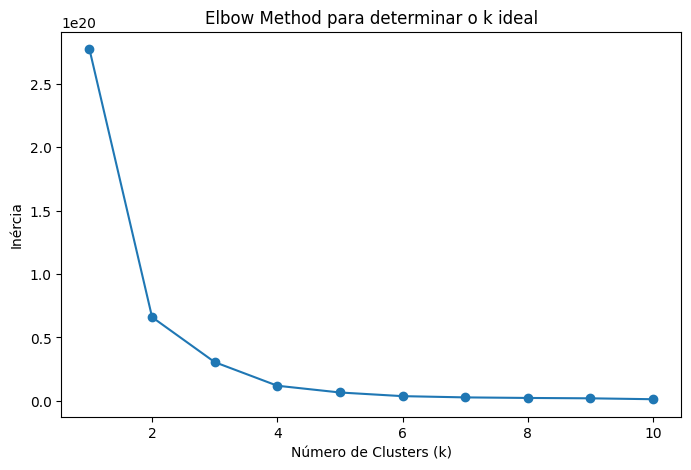

In [604]:
# Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_filtered_num_clus)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Elbow Method para determinar o k ideal')
plt.show()

In [605]:
# Criando cluster com o número ideal
kmeans = KMeans(n_clusters=3, random_state=42)
df_filtered_num_clus['kmeans_cluster'] = kmeans.fit_predict(df_filtered_num_clus)
df_filtered_num_clus['kmeans_cluster'].value_counts()

,count
kmeans_cluster,
0,870
2,9
1,3


In [606]:
# Salvand a clusterização em um .csv
df_filtered_num_clus.to_csv("data_filtered_clust.csv", index=False)

# Modelo de Regressão

Primeiro é necessario criar um conjunto de teste, colocá-lo de lado e nunca checá-lo.

In [607]:
#Separando a base de treino e teste
train_set, test_set = train_test_split(df_countrys, test_size=0.2, random_state=42)
df_train = train_set.copy()

#Separando a Label principal
df_treatment_label = df_train[['green_energy_consumption']].copy()

#Remove a Label da base
df_treatment = df_train.drop('green_energy_consumption', axis=1)

#Selecionando as variáveis float64
df_treatment_float64 = df_treatment.select_dtypes(np.float64).copy()

#Adicionando estratégia da mediana no imputer
imputer = SimpleImputer(strategy="median")

#Treina o imputer
imputer.fit(df_treatment_float64)

SimpleImputer(strategy='median')

In [608]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 573 entries, 84 to 133
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        573 non-null    object 
 1   year                           573 non-null    int64  
 2   gdp_millions                   573 non-null    float64
 3   population                     573 non-null    float64
 4   fossil_share_energy            573 non-null    float64
 5   fossil_share_elec              573 non-null    float64
 6   biofuel_consumption            573 non-null    float64
 7   biofuel_share_energy           573 non-null    float64
 8   solar_consumption              573 non-null    float64
 9   solar_share_energy             573 non-null    float64
 10  wind_consumption               573 non-null    float64
 11  wind_share_energy              573 non-null    float64
 12  hydro_consumption              573 non-null    float64

In [609]:
#Criando uma nova matriz preenchendo os valores nulos com o imputer
float_vars =  imputer.transform(df_treatment_float64)

#Criando novo dataset para apresentar os valores
df_float64 = pd.DataFrame(float_vars, columns=df_treatment_float64.columns,
                          index=df_treatment_float64.index)
df_float64.head()

,gdp_millions,population,fossil_share_energy,fossil_share_elec,biofuel_consumption,biofuel_share_energy,solar_consumption,solar_share_energy,wind_consumption,wind_share_energy,...,other_renewable_consumption,other_renewables_share_energy,greenhouse_gas_emissions,energy_per_capita,primary_energy_consumption,per_capita_electricity,electricity_generation,fossil_energy_consumption,energy_consumption,renewable_share_energy
84,0.000,11561716.0,76.068,34.134,7.523,1.133,13.426,2.022,33.665,5.070,...,16.818,2.533,17.41,57433.730,664.032,7601.813,87.89,505.117,577.250,10.862880
270,192989.479,5246070.0,62.447,33.556,0.000,0.000,0.008,0.002,0.487,0.136,...,30.365,8.493,17.74,68155.328,357.548,13406.226,70.33,223.277,293.606,19.669807
394,137740.222,45831860.0,0.000,19.952,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,1.40,1655.022,75.853,182.624,8.37,0.000,0.000,0.000000
676,237715.210,21092264.0,84.040,56.623,0.000,0.000,0.000,0.000,0.000,0.000,...,0.019,0.004,24.72,21728.150,458.296,2816.672,59.41,385.152,443.032,12.629392
35,23626.535,3047254.0,0.000,28.811,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.91,11997.367,36.559,1959.141,5.97,0.000,0.000,0.000000


In [610]:
df_treatment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 573 entries, 84 to 133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        573 non-null    object 
 1   year                           573 non-null    int64  
 2   gdp_millions                   573 non-null    float64
 3   population                     573 non-null    float64
 4   fossil_share_energy            573 non-null    float64
 5   fossil_share_elec              573 non-null    float64
 6   biofuel_consumption            573 non-null    float64
 7   biofuel_share_energy           573 non-null    float64
 8   solar_consumption              573 non-null    float64
 9   solar_share_energy             573 non-null    float64
 10  wind_consumption               573 non-null    float64
 11  wind_share_energy              573 non-null    float64
 12  hydro_consumption              573 non-null    float64

In [611]:
#novo dataset com a seleção das variaveis numéricas categóricas
df_treatment_cat_num = df_treatment[['year', 'population', 'gdp_millions']].copy()

#novo dataset com a seleção das variáveis categóricas
df_treatment_cat = df_treatment[['country']]

ordinal_encoder = OrdinalEncoder()
df_treatment_cat_encoded = ordinal_encoder.fit_transform(df_treatment_cat)
df_treatment_cat_encoded[:10]

array([[ 18.],
       [ 68.],
       [105.],
       [176.],
       [  8.],
       [ 76.],
       [ 58.],
       [ 97.],
       [210.],
       [181.]])

In [612]:
#tratamento da categoria com o OneHotEncoder
cat_encoder = OneHotEncoder()
df_treatment_cat_1hot = cat_encoder.fit_transform(df_treatment_cat)
df_treatment_cat_1hot

<573x241 sparse matrix of type '<class 'numpy.float64'>'
	with 573 stored elements in Compressed Sparse Row format>

In [613]:
scaler = MinMaxScaler()
scaler.fit(df_float64)
df_float64_transform = scaler.transform(df_float64)

In [614]:
#Tratamento com o SatandardScaler
standard = StandardScaler()
standard.fit(df_float64)
df_float64_stardard_transform = standard.transform(df_float64)
df_float64_stardard_transform

array([[-1.88654343e-01, -1.43782803e-01,  1.39546240e+00, ...,
         5.41721358e-04,  3.06915980e-03,  5.98113723e-01],
       [-3.29834118e-02, -1.97336901e-01,  1.03509494e+00, ...,
        -1.07945449e-01, -9.43637115e-02,  1.41845472e+00],
       [-7.75490705e-02,  1.46814018e-01, -6.17050009e-01, ...,
        -1.93890276e-01, -1.95218571e-01, -4.13733701e-01],
       ...,
       [-4.10828674e-02, -1.56401987e-01,  1.65127276e+00, ...,
        -9.22178120e-02, -1.02449798e-01, -2.34439823e-01],
       [-8.89182892e-02, -2.06777129e-01,  1.11131685e+00, ...,
        -1.36365978e-01, -1.16639264e-01,  2.81585475e+00],
       [ 8.69048478e-01,  3.13563581e-02,  1.10565511e+00, ...,
         7.56847884e-01,  1.02151238e+00,  2.21911803e+00]])

In [615]:
#Criação do novo pipeline com o Imputer e StandardScaler
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [616]:
consumption_num_tr = num_pipeline.fit_transform(df_float64)

In [617]:
consumption_num_tr.shape

(573, 24)

In [618]:
#Seleção das variáveis numéricas, categóricas numéricas e categóricas.
num_attr = list(df_float64.columns)
cat_num_attr = list(df_treatment_cat_num.columns)
cat_attr = list(df_treatment_cat.columns)

In [619]:
#Criação do Full Pipeline
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attr),
    ("cat_num", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), cat_num_attr),
    ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attr),
])

In [620]:
#Transformação dos dados através do full pipeline
df_prepared = full_pipeline.fit_transform(df_treatment)

# Treinamento do nosso modelo
Chegou a grande hora de treinarmos o nosso modelo de regressão


In [621]:
lin_reg = LinearRegression()
lin_reg.fit(df_prepared, df_treatment_label)

LinearRegression()

In [622]:
dados = df_treatment.iloc[:10]
labels = df_treatment_label.iloc[:10]

dados_preparados = full_pipeline.transform(dados)
lin_reg.predict(dados_preparados)

array([[ 7.22401317e+01],
       [ 7.04049311e+01],
       [-4.68359913e-02],
       [ 5.78402234e+01],
       [ 3.13622903e-02],
       [ 2.98557593e-02],
       [ 3.71035755e+01],
       [ 1.21246136e+01],
       [ 9.87330389e+01],
       [ 4.37146936e-03]])

In [623]:
#Verifica os valores reais
labels.values

array([[72.133],
       [70.329],
       [ 0.   ],
       [57.88 ],
       [ 0.   ],
       [ 0.   ],
       [37.669],
       [11.923],
       [98.789],
       [ 0.   ]])

In [624]:
dados_predictions = lin_reg.predict(dados_preparados)
lin_mse = mean_squared_error(labels, dados_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.1965698784203176

In [625]:
dados_predictions = lin_reg.predict(dados_preparados)
lin_mae = mean_absolute_error(labels, dados_predictions)
lin_mae

0.11582641911060385

In [626]:
#Nova variáveil com o R²
r_squared = r2_score(labels, dados_predictions)
# Exibindo o resultado
r_squared

0.9999694765752847

In [627]:
#Treinamento da Árvore de Decisão
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(df_prepared, df_treatment_label)

DecisionTreeRegressor(random_state=42)

In [628]:
#Realiza as previsões e testa a métrica do RMSE
dados_predictions = tree_reg.predict(dados_preparados)
tree_mse = mean_squared_error(labels, dados_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [629]:
#Fazendo uma nova variáveil com o R²
r_quared = r2_score(labels, dados_predictions)
# Exibindo o resultado
r_quared

1.0

In [630]:
#Usando o random forest para treino
forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(df_prepared, df_treatment_label)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(n_estimators=10, random_state=42)

In [631]:
#Realiza as previsões e testa a métrica do RMSE
dados_predictions = forest_reg.predict(dados_preparados)
forest_mse = mean_squared_error(labels, dados_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

41.30662024137293

# Criação Final do modelo


In [632]:
#seleciona o dataset de teste
df_consumption_test = test_set.copy()

#seleciona o modelo final
final_model = forest_reg

# Usando o conjunto de teste para a avaliação
X_test = df_consumption_test.drop('green_energy_consumption', axis=1)
y_test = df_consumption_test["green_energy_consumption"].copy()

# Transformando os dados de teste com o pipeline usado no treinamento
X_test_prepared = full_pipeline.transform(X_test)
X_test_prepared

<144x268 sparse matrix of type '<class 'numpy.float64'>'
	with 3901 stored elements in Compressed Sparse Row format>

In [633]:
# Fazendo previsões com o modelo final
final_predictions = final_model.predict(X_test_prepared)

# Calculando as métricas de desempenho
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_mae = mean_absolute_error(y_test, final_predictions)
final_r_squared = r2_score(y_test, final_predictions)

# Exibindo os resultados
print(f"RMSE {final_rmse}")
print(f"MAE {final_mae}")
print(f"R² {final_r_squared}")

RMSE 36.64678888529812
MAE 8.647152777777777
R² 0.9487044442460882


In [634]:
#avalia os dados de entrada
X_test.iloc[3].values

array(['Tonga', 2020, 0.0, 105265.0, 0.0, 85.714, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04, 6542.066, 0.689, 664.988,
       0.07, 0.0, 0.0, 0.0], dtype=object)

In [635]:
#previsão final
final_predictions[3]

0.0

#Exportando o Modelo


In [636]:
#realiza o dumping do modelo
pkl_modelo = "consumption_model.pkl"
pickle.dump(final_model, open(pkl_modelo, 'wb'))

#realiza o dumping do pipeline
pkl_full_pipeline = "full_pipeline.pkl"
pickle.dump(full_pipeline, open(pkl_full_pipeline, 'wb'))

In [637]:
#import do modelo e do pipeline
loaded_model = pickle.load(open("consumption_model.pkl", "rb"))
loaded_full_pipeline = pickle.load(open("full_pipeline.pkl", "rb"))

In [638]:
X_test.columns

Index(['country', 'year', 'gdp_millions', 'population', 'fossil_share_energy',
       'fossil_share_elec', 'biofuel_consumption', 'biofuel_share_energy',
       'solar_consumption', 'solar_share_energy', 'wind_consumption',
       'wind_share_energy', 'hydro_consumption', 'hydro_share_energy',
       'nuclear_consumption', 'nuclear_share_energy',
       'other_renewable_consumption', 'other_renewables_share_energy',
       'greenhouse_gas_emissions', 'energy_per_capita',
       'primary_energy_consumption', 'per_capita_electricity',
       'electricity_generation', 'fossil_energy_consumption',
       'energy_consumption', 'renewable_share_energy'],
      dtype='object')

In [639]:
#Estrutura os dados de entrada para integração do modelo
columns = ['hydro_share_energy', 'other_renewables_share_energy', 'country', 'greenhouse_gas_emissions', 'nuclear_consumption', 'energy_per_capita', 'solar_consumption', 'energy_consumption', 'other_renewable_consumption', 'per_capita_electricity', 'solar_share_energy', 'hydro_consumption', 'nuclear_share_energy', 'wind_share_energy', 'fossil_energy_consumption', 'electricity_generation', 'year', 'biofuel_share_energy', 'fossil_share_elec', 'wind_consumption', 'biofuel_consumption', 'fossil_share_energy', 'gdp_millions', 'population', 'primary_energy_consumption', 'renewable_share_energy']

values = [0.30, 0.05, 'Brasil', 1200, 0.03, 2700, 0.02, 90000, 3000, 2200, 0.04, 30000, 0.01, 0.06, 55000, 85000, 2023, 0.10, 0.65, 2500, 5000, 0.55, 2000000, 213000000, 120000, 0.45]

#Cria o dataframe
df = pd.DataFrame([values], columns=columns)
df.head()

,hydro_share_energy,other_renewables_share_energy,country,greenhouse_gas_emissions,nuclear_consumption,energy_per_capita,solar_consumption,energy_consumption,other_renewable_consumption,per_capita_electricity,...,year,biofuel_share_energy,fossil_share_elec,wind_consumption,biofuel_consumption,fossil_share_energy,gdp_millions,population,primary_energy_consumption,renewable_share_energy
0,0.3,0.05,Brasil,1200,0.03,2700,0.02,90000,3000,2200,...,2023,0.1,0.65,2500,5000,0.55,2000000,213000000,120000,0.45


In [640]:
#Prepada os dados para a predição
X_test_prepared = loaded_full_pipeline.transform(df)
X_test_prepared

<1x268 sparse matrix of type '<class 'numpy.float64'>'
	with 27 stored elements in Compressed Sparse Row format>

In [641]:
#Realiza a Predição
prediction = loaded_model.predict(X_test_prepared)
prediction[0]

3175.0919999999996

In [642]:
#Verifica a versão da biblioteca para adicionar ao Flask
import sklearn
sklearn.__version__

'1.5.2'